# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
pd.set_option('display.max_colwidth', -1)

In [4]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,"социальный статус клиента относительно работы (1 - работает, 0 - не работает)"
3,SOCSTATUS_PENS_FL,"социальный статус клиента относительно пенсии (1 - пенсионер, 0 - не пенсионер)"
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [5]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8' , index_col='AGREEMENT_RK')

In [6]:
df_train.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
AGREEMENT_RK,,,,,,,,,,,,,,,,,,,,,
59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,...,0,1,1,1,6,2,1,1580,1580,NaN
59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,...,0,1,1,1,6,1,1,4020,4020,NaN
59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,Информационные технологии,...,0,1,2,1,11,0,0,0,0,NaN
59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,Образование,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,Государственная служба,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


In [7]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8', index_col='AGREEMENT_RK')

In [8]:
df_test.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
AGREEMENT_RK,,,,,,,,,,,,,,,,,,,,,
59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,Образование,...,0,1,2,2,8,0,0,0,0,NaN
59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,NaN,...,0,0,2,1,15,0,0,0,0,NaN
59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,Металлургия/Промышленность/Машиностроение,...,0,1,1,1,1,0,0,0,0,NaN
59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,Другие сферы,...,0,1,3,2,9,0,0,0,0,NaN
59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,Образование,...,0,1,1,1,5,0,0,0,0,NaN


In [9]:
df_train.head().T

AGREEMENT_RK,59910150,59910230,59910525,59910803,59911781
TARGET,0,0,0,0,0
AGE,49,32,52,39,30
SOCSTATUS_WORK_FL,1,1,1,1,1
SOCSTATUS_PENS_FL,0,0,0,0,0
GENDER,1,1,1,1,0
CHILD_TOTAL,2,3,4,1,0
DEPENDANTS,1,3,0,1,0
EDUCATION,Среднее специальное,Среднее,Неполное среднее,Высшее,Среднее
MARITAL_STATUS,Состою в браке,Состою в браке,Состою в браке,Состою в браке,Состою в браке
GEN_INDUSTRY,Торговля,Торговля,Информационные технологии,Образование,Государственная служба


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [10]:
df_train['sample'] = 0
df_test['sample'] = 1

In [11]:
df_test.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
AGREEMENT_RK,,,,,,,,,,,,,,,,,,,,,
59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,Образование,...,1,2,2,8,0,0,0,0,NaN,1
59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,NaN,...,0,2,1,15,0,0,0,0,NaN,1
59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,Металлургия/Промышленность/Машиностроение,...,1,1,1,1,0,0,0,0,NaN,1
59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,Другие сферы,...,1,3,2,9,0,0,0,0,NaN,1
59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,Образование,...,1,1,1,5,0,0,0,0,NaN,1


In [12]:
df = df_test.append(df_train)

In [13]:
# смотрим что получилось
df.describe()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,...,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,PREVIOUS_CARD_NUM_UTILIZED,sample
count,30133.000000,30133.000000,30133.000000,30133.000000,30133.000000,30133.000000,30133.000000,30133.000000,30133.000000,30133.000000,...,30133.000000,30133.000000,30133.000000,30133.000000,30133.000000,30133.000000,30133.000000,30133.000000,600.000000,30133.000000
mean,0.118209,40.424584,0.909136,0.133475,0.655295,1.094249,0.642684,0.836591,0.949092,0.886470,...,0.609199,0.056417,0.909866,1.390668,0.756878,7.891182,0.191518,0.128431,1.008333,0.494806
std,0.322861,11.614787,0.287420,0.340093,0.475280,0.987381,0.809184,0.369744,0.219813,0.317245,...,0.487938,0.230728,0.286378,0.800427,0.992219,7.982088,0.674972,0.351410,0.090982,0.499981
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,39.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,5.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,50.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,2.000000,1.000000,8.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,67.000000,1.000000,1.000000,1.000000,10.000000,7.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,11.000000,11.000000,114.000000,13.000000,8.000000,2.000000,1.000000


### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30133 entries, 59909969 to 75292242
Data columns (total 52 columns):
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PROVINCE          30133 non-null object
FACT

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [15]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Ученая степень', 'Высшее', 'Среднее', 'Неоконченное высшее', 'Два и более высших образования', 'Неполное среднее', 'Среднее специальное'}


MARITAL_STATUS
{'Не состоял в браке', 'Гражданский брак', 'Разведен(а)', 'Состою в браке', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Сборочные производства', 'Коммунальное хоз-во/Дорожные службы', 'Развлечения/Искусство', 'СМИ/Реклама/PR-агенства', 'ЧОП/Детективная д-ть', 'Ресторанный бизнес/Общественное питание', 'Информационные услуги', 'Управляющая компания', 'Сельское хозяйство', 'Строительство', 'Энергетика', 'Недвижимость', 'Торговля', 'Юридические услуги/нотариальные услуги', 'Страхование', 'Химия/Парфюмерия/Фармацевтика', 'Государственная служба', 'Образование', 'Нефтегазовая промышленность', 'Салоны красоты и здоровья', 'Наука', 'Металлургия/Промышленность/Машиностроение', 'Здравоохранение', 'Информационные технологии', 'Логистика', 'Другие сферы', 'Транспорт', 'Маркетинг', 'Банк/Финансы', 'Туризм', 'Подбор персонала'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [16]:
for col in ['PERSONAL_INCOME','CREDIT','FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
    df[col] = df[col].map(lambda x: x.replace(',', '.')).astype('float')

In [17]:
# убираем похожие параметры с большой корреляцией
df.drop([
    'FACT_ADDRESS_PROVINCE',
    'POSTAL_ADDRESS_PROVINCE',
    'TP_PROVINCE',
#     'LOAN_MAX_DLQ',               
#     'LOAN_AVG_DLQ_AMT',          
#     'LOAN_MAX_DLQ_AMT',
    
], axis = 1, inplace = True);

In [18]:
listObject = ['EDUCATION',
              'MARITAL_STATUS',
              'GEN_INDUSTRY',
              'GEN_TITLE',
              'ORG_TP_STATE',
              'ORG_TP_FCAPITAL',
              'JOB_DIR',
              'FAMILY_INCOME',
              'REG_ADDRESS_PROVINCE',
              'REGION_NM'
             ]

In [19]:
# df = pd.get_dummies(df, columns=listObject)
from sklearn.preprocessing import LabelEncoder
for col in listObject:
    label = LabelEncoder()
    label.fit(df[col].astype(str).drop_duplicates())
    df[col] = label.transform(df[col].astype(str))

In [20]:
# df = df[[
#     'AGE',
#     'TARGET',
#     'SOCSTATUS_WORK_FL',
#     'GENDER',
#     'EDUCATION',
#     'MARITAL_STATUS',
#     'GEN_INDUSTRY',
#     'FL_PRESENCE_FL',
#     'OWN_AUTO',
#     'CREDIT',                        
#     'TERM',
#     'LOAN_NUM_TOTAL',
#     'LOAN_NUM_CLOSED',
#     'LOAN_NUM_PAYM',
#     'LOAN_DLQ_NUM',
#     'LOAN_MAX_DLQ',
#     'LOAN_AVG_DLQ_AMT',
#     'LOAN_MAX_DLQ_AMT',
# ]]
# проставляем медиану для рабочего времени
for col in ['WORK_TIME']:
    df[col] = df[col].fillna(df[col].median())

In [21]:
# устанавливаем 0 для Nan карт утилизированных
df['PREVIOUS_CARD_NUM_UTILIZED'] = df['PREVIOUS_CARD_NUM_UTILIZED'].map(lambda s: s if s>0 else 0)

In [22]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


X = df.copy()
y = df['TARGET']
X.drop(['TARGET'], axis=1, inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

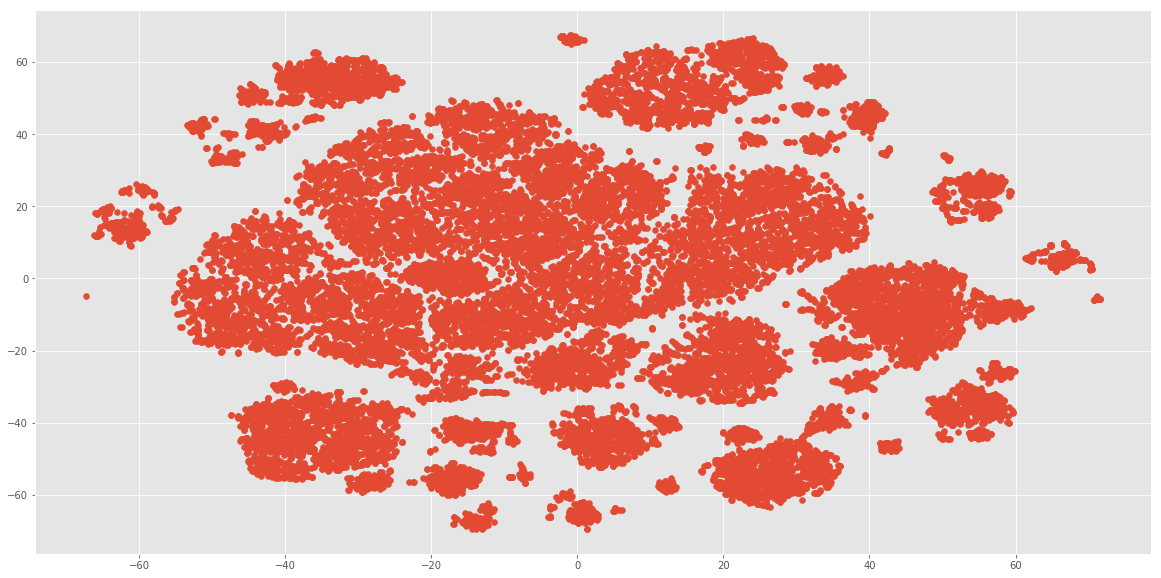

In [23]:
plt.subplots(figsize=(20,10))
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

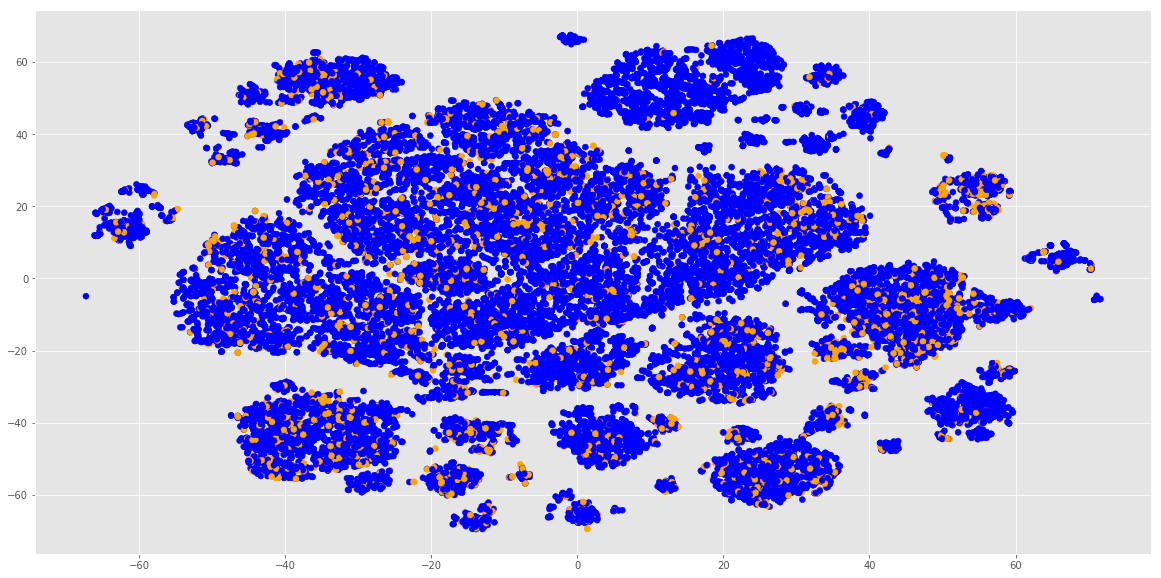

In [24]:
plt.subplots(figsize=(20,10))
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=y.map({0: 'blue', 1: 'orange'}));

In [25]:
df.head().T

AGREEMENT_RK,59909969,59910420,59911223,59911322,59911438
TARGET,0.0,0.0,0.0,0.0,0.0
AGE,30.0,48.0,35.0,22.0,27.0
SOCSTATUS_WORK_FL,1.0,0.0,1.0,1.0,1.0
SOCSTATUS_PENS_FL,0.0,1.0,0.0,0.0,0.0
GENDER,1.0,1.0,0.0,0.0,1.0
CHILD_TOTAL,1.0,0.0,1.0,0.0,2.0
DEPENDANTS,1.0,0.0,0.0,0.0,2.0
EDUCATION,5.0,4.0,4.0,4.0,0.0
MARITAL_STATUS,2.0,4.0,2.0,2.0,4.0
GEN_INDUSTRY,14.0,0.0,10.0,3.0,14.0


Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [26]:
# смотрим пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30133 entries, 59909969 to 75292242
Data columns (total 49 columns):
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null int64
MARITAL_STATUS                30133 non-null int64
GEN_INDUSTRY                  30133 non-null int64
GEN_TITLE                     30133 non-null int64
ORG_TP_STATE                  30133 non-null int64
ORG_TP_FCAPITAL               30133 non-null int64
JOB_DIR                       30133 non-null int64
FAMILY_INCOME                 30133 non-null int64
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PROVINCE          30133 non-null int64
REGION_NM   

In [27]:
# смотрим что получилось
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30133 entries, 59909969 to 75292242
Data columns (total 49 columns):
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null int64
MARITAL_STATUS                30133 non-null int64
GEN_INDUSTRY                  30133 non-null int64
GEN_TITLE                     30133 non-null int64
ORG_TP_STATE                  30133 non-null int64
ORG_TP_FCAPITAL               30133 non-null int64
JOB_DIR                       30133 non-null int64
FAMILY_INCOME                 30133 non-null int64
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PROVINCE          30133 non-null int64
REGION_NM   

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [28]:
# посмотрим на корреляцию наших параметров

import seaborn as sns
# plt.subplots(figsize=(20,15))
# corr = df.corr('kendall')
# sns.heatmap(corr, center=0);

In [29]:
# смотрим что получается
# plt.subplots(figsize=(20,15))
# corr = df.corr('kendall')
# sns.heatmap(corr, center=0);

In [30]:
df_train_preproc = df.query('sample == 1').drop(['sample'], axis=1)
df_test_preproc = df.query('sample == 0').drop(['sample'], axis=1)

In [31]:
df_train_preproc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14910 entries, 59909969 to 75292243
Data columns (total 48 columns):
TARGET                        14910 non-null int64
AGE                           14910 non-null int64
SOCSTATUS_WORK_FL             14910 non-null int64
SOCSTATUS_PENS_FL             14910 non-null int64
GENDER                        14910 non-null int64
CHILD_TOTAL                   14910 non-null int64
DEPENDANTS                    14910 non-null int64
EDUCATION                     14910 non-null int64
MARITAL_STATUS                14910 non-null int64
GEN_INDUSTRY                  14910 non-null int64
GEN_TITLE                     14910 non-null int64
ORG_TP_STATE                  14910 non-null int64
ORG_TP_FCAPITAL               14910 non-null int64
JOB_DIR                       14910 non-null int64
FAMILY_INCOME                 14910 non-null int64
PERSONAL_INCOME               14910 non-null float64
REG_ADDRESS_PROVINCE          14910 non-null int64
REGION_NM   

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

#### Задание 5. Обучение и оценка качества разных моделей

In [32]:
df_train_preproc.shape

(14910, 48)

In [33]:
df_test_preproc.shape

(15223, 48)

In [34]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
# test_size=0.3, random_state=42

## Your Code Here

X, X_test, y, y_test = train_test_split(df_train_preproc.drop(['TARGET'], axis=1), df_train_preproc['TARGET'], test_size=0.3, random_state=42)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here

In [36]:
lr = LogisticRegression()
lr.fit(X, y)
pred = lr.predict_proba(X_test)
p = lr.predict(X_test)
lrFpr, lrTpr, lrTheshhold = roc_curve(y_test, pred[:, 1])
lrRoc = auc(lrFpr, lrTpr)
scores = cross_val_score(lr, df_train_preproc.drop(['TARGET'], axis=1), df_train_preproc['TARGET'])
# lrRoc = roc_auc
lrScore = scores.mean()

lrAccuracy = accuracy_score(y_test,p)
lrPrecision = precision_score(y_test,p)
lrRecall = recall_score(y_test,p)

In [37]:
dt = DecisionTreeClassifier()
dt.fit(X, y)
pred = dt.predict_proba(X_test)
p = dt.predict(X_test)
dtFpr, dtTpr, dtTheshhold = roc_curve(y_test, pred[:, 1])
roc_auc = auc(dtFpr, dtTpr)
scores = cross_val_score(dt, df_train_preproc.drop(['TARGET'], axis=1), df_train_preproc['TARGET'])
dtRoc = roc_auc
dtScore = scores.mean()
dtAccuracy = accuracy_score(y_test,p)
dtPrecision = precision_score(y_test,p)
dtRecall = recall_score(y_test,p)

In [38]:
rfc = RandomForestClassifier()
rfc.fit(X, y)
pred = rfc.predict_proba(X_test)
p = rfc.predict(X_test)
rfcFpr, rfcTpr, rfcTheshhold = roc_curve(y_test, pred[:, 1])
roc_auc = auc(rfcFpr, rfcTpr)
scores = cross_val_score(rfc, df_train_preproc.drop(['TARGET'], axis=1), df_train_preproc['TARGET'])
rfcRoc = roc_auc
rfcScore = scores.mean()

# for x in np.nditer(p, op_flags=['readwrite']):
#     x[...]=1 if x == 0 else 0

rfcAccuracy = accuracy_score(y_test,p)
rfcPrecision = precision_score(y_test,p)
rfcRecall = recall_score(y_test,p)


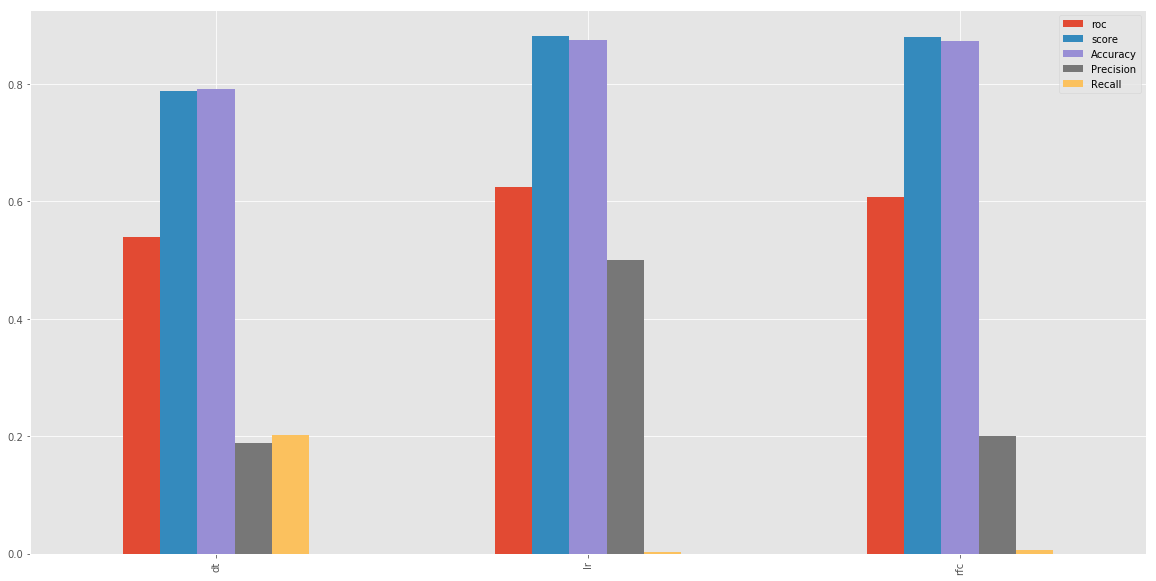

In [39]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here
pd.DataFrame.from_dict(data = {
    'lr': {
        'roc': lrRoc,
        'score':  lrScore,
        'Accuracy': lrAccuracy,
        'Precision': lrPrecision,
        'Recall': lrRecall,
    },
    'dt': {
        'roc': dtRoc,
        'score':  dtScore,
        'Accuracy': dtAccuracy,
        'Precision': dtPrecision,
        'Recall': dtRecall,
    },
    'rfc': {
        'roc': rfcRoc,
        'score':  rfcScore,
        'Accuracy': rfcAccuracy,
        'Precision': rfcPrecision,
        'Recall': rfcRecall,
    }
}, orient = 'index').plot(kind="bar", figsize=(20,10))

<Figure size 432x288 with 0 Axes>

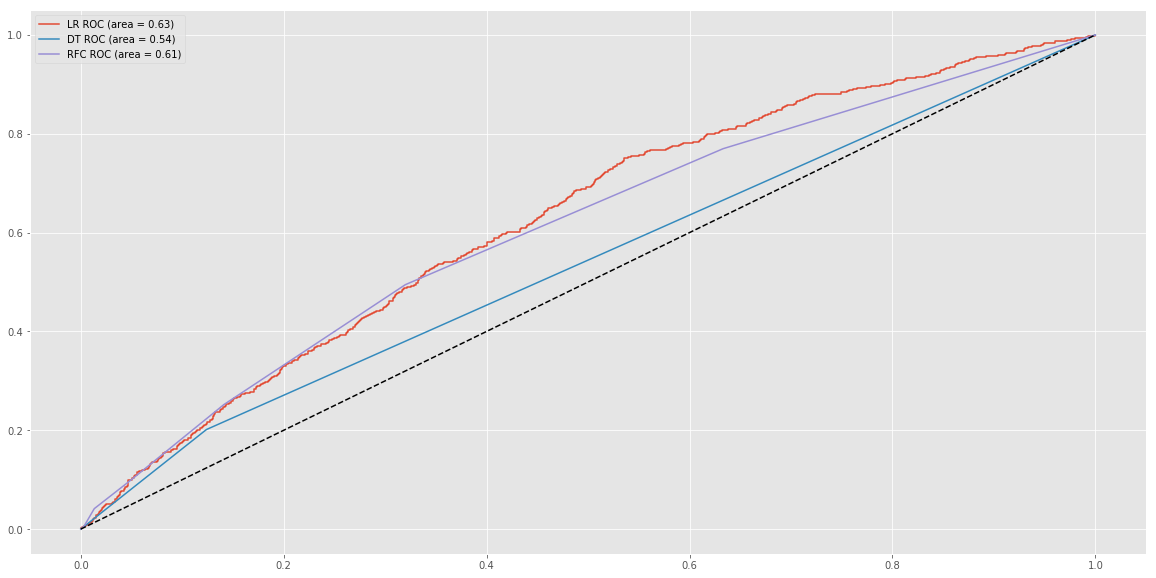

In [40]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
import pylab as pl
## Your Code Here
pl.clf()
plt.figure(figsize=(20, 10))
pl.plot(lrFpr, lrTpr, label='LR ROC (area = %0.2f)' % (lrRoc))
pl.plot(dtFpr, dtTpr, label='DT ROC (area = %0.2f)' % (dtRoc))
pl.plot(rfcFpr, rfcTpr, label='RFC ROC (area = %0.2f)' % (rfcRoc))
pl.plot([0,1],[0,1], 'k--')
pl.legend()

In [41]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
gen = cv.split(df_train_preproc.drop(['TARGET'], axis=1), df_train_preproc['TARGET'])

cross_val_score(
    lr,
    df_train_preproc.drop(['TARGET'], axis=1),
    df_train_preproc['TARGET'],
    scoring='roc_auc',
    cv = gen
).mean()


## Your Code Here

0.6286956144159792

In [42]:
gen = cv.split(df_train_preproc.drop(['TARGET'], axis=1), df_train_preproc['TARGET'])
cross_val_score(
    dt,
    df_train_preproc.drop(['TARGET'], axis=1),
    df_train_preproc['TARGET'],
    scoring='roc_auc',
    cv = gen
).mean()

0.5363647416413373

In [43]:
gen = cv.split(df_train_preproc.drop(['TARGET'], axis=1), df_train_preproc['TARGET'])
cross_val_score(
    rfc,
    df_train_preproc.drop(['TARGET'], axis=1),
    df_train_preproc['TARGET'],
    scoring='roc_auc',
    cv = gen
).mean()

0.611681936604429

In [44]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here
pred = rfc.predict_proba(df_test_preproc.drop(['TARGET'], axis=1))


In [45]:
# Померить roc_auc на тесте

In [46]:
rfcFpr, rfcTpr, rfcTheshhold = roc_curve(df_test_preproc['TARGET'], pred[:, 1])
roc_auc = auc(rfcFpr, rfcTpr)

In [47]:
roc_auc

0.5927025161217365